In [37]:
#import packages
import pandas as pd
import math, copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('ex1data1.txt')

In [39]:
df

,6.1101,17.592
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [40]:
df.columns

Index(['6.1101', '17.592'], dtype='object')

In [41]:
df.rename(columns={"6.1101" : "population", "17.592" : "profit"}, inplace=True)

In [42]:
df.columns

Index(['population', 'profit'], dtype='object')

In [43]:
x = df['population']
y = df['profit']

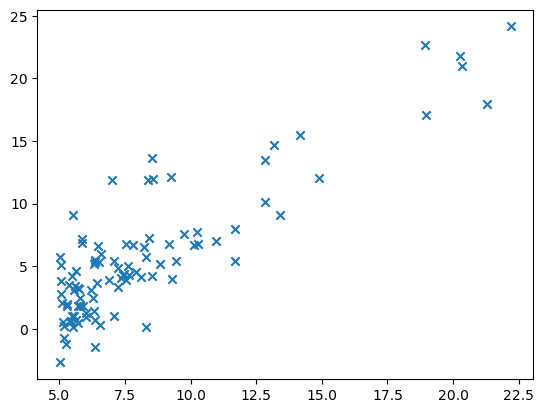

In [44]:
plt.scatter(x, y, marker='x')
plt.show()

In [45]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [46]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [47]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing
#copied :)

In [48]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.01
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 5.90e+00  dj_dw: -6.489e+01, dj_db: -5.717e+00   w:  6.489e-01, b: 5.71671e-02
Iteration 1000: Cost 3.50e+00  dj_dw: -1.273e-02, dj_db:  1.271e-01   w:  1.143e+00, b:-3.50898e+00
Iteration 2000: Cost 3.46e+00  dj_dw: -2.088e-03, dj_db:  2.085e-02   w:  1.202e+00, b:-4.09625e+00
Iteration 3000: Cost 3.46e+00  dj_dw: -3.426e-04, dj_db:  3.421e-03   w:  1.212e+00, b:-4.19260e+00
Iteration 4000: Cost 3.46e+00  dj_dw: -5.621e-05, dj_db:  5.612e-04   w:  1.213e+00, b:-4.20840e+00
Iteration 5000: Cost 3.46e+00  dj_dw: -9.221e-06, dj_db:  9.207e-05   w:  1.213e+00, b:-4.21100e+00
Iteration 6000: Cost 3.46e+00  dj_dw: -1.513e-06, dj_db:  1.510e-05   w:  1.214e+00, b:-4.21142e+00
Iteration 7000: Cost 3.46e+00  dj_dw: -2.482e-07, dj_db:  2.478e-06   w:  1.214e+00, b:-4.21149e+00
Iteration 8000: Cost 3.46e+00  dj_dw: -4.072e-08, dj_db:  4.065e-07   w:  1.214e+00, b:-4.21150e+00
Iteration 9000: Cost 3.46e+00  dj_dw: -6.680e-09, dj_db:  6.669e-08   w:  1.214e+00, b:-4.21150e+00


In [51]:
print(f"population of 35,000 people {w_final*35.0 + b_final:0.1f} Thousand dollars")
print(f"population of 70,000 people {w_final*70.0 + b_final:0.1f} Thousand dollars")

population of 35,000 people 38.3 Thousand dollars
population of 70,000 people 80.7 Thousand dollars
